Dysponujemy czterema rodzajami specjalistów (typy: A, B, C, D), którzy zajmują się wykrywaniem zagrożeń. Każdy z tych specjalistów ma kompetencje do wykonywania trzech rodzajów zadań (wykrywanie i neutralizacja zagrożeń czterech typów: I, II, III). Liczby specjalistów każdego typu, którymi Centrum dysponuje, są następujące: typ A - 17, typ B - 12, typ C – 8, typ D - 10. Natomiast zapotrzebowanie na tych specjalistów do wykonania poszczególnych rodzajów zadań wynosi: zadanie I - 10, zadanie II - 15, zadanie III - 12 specjalistów dowolnego typu. Wydajność specjalistów przy wykonywaniu poszczególnych zadań (w liczbie zadań na jednostkę czasu) oraz koszty utrzymania specjalistów poszczególnych typów podano w tabeli. Jak zbudować model optymalizacyjny problemu i wykorzystać metakryterium liniowej kombinacji funkcji kryteriów

![Alt text](image.png)

In [55]:
# imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pulp
import seaborn as sns


In [56]:
# data
#

# Typy specjalistów i ich liczność
specialists = {'A': 17, 'B': 12, 'C': 8, 'D': 10}

# Rodzaje zadań i ich zapotrzebowanie
tasks = {'I': 10, 'II': 15, 'III': 12}

# Wydajność specjalistów
efficiency = {
    'A': {'I': 14.0, 'II': 8.0, 'III': 15.0},
    'B': {'I': 9.0, 'II': 9.0, 'III': 10.0},
    'C': {'I': 6.0, 'II': 7.0, 'III': 6.0},
    'D': {'I': 11.0, 'II': 4.0, 'III': 9.0}
}

# Koszty utrzymania specjalistów
costs = {
    'A': {'I': 12.0, 'II': 12.0, 'III': 18.0},
    'B': {'I': 8.0, 'II': 19.0, 'III': 14.0},
    'C': {'I': 10.0, 'II': 15.0, 'III': 11.0},
    'D': {'I': 12.0, 'II': 13.0, 'III': 14.0}
}


In [57]:
# Weights for efficiency and cost
efficiency_weight = 0.5  # Adjust this as needed
cost_weight = 0.5  # Adjust this as needed

In [58]:
# Combined Values
# combined_values = {i: {j: efficiency[i][j] - costs[i][j] for j in tasks} for i in specialists}

# Weights added to combined_values
combined_values = {i: {j: efficiency_weight * efficiency[i][j] - cost_weight * costs[i][j] for j in tasks} for i in specialists}
max_value = max(max(d.values()) for d in combined_values.values())
min_value = min(min(d.values()) for d in combined_values.values())

In [59]:
combined_values

{'A': {'I': 1.0, 'II': -2.0, 'III': -1.5},
 'B': {'I': 0.5, 'II': -5.0, 'III': -2.0},
 'C': {'I': -2.0, 'II': -4.0, 'III': -2.5},
 'D': {'I': -0.5, 'II': -4.5, 'III': -2.5}}

In [60]:
normalized_values = {i: {j: (combined_values[i][j] - min_value) / (max_value - min_value) for j in tasks} for i in combined_values}
normalized_values

{'A': {'I': 1.0, 'II': 0.5, 'III': 0.5833333333333334},
 'B': {'I': 0.9166666666666666, 'II': 0.0, 'III': 0.5},
 'C': {'I': 0.5, 'II': 0.16666666666666666, 'III': 0.4166666666666667},
 'D': {'I': 0.75, 'II': 0.08333333333333333, 'III': 0.4166666666666667}}

In [61]:
# Setting up the problem
problem = pulp.LpProblem("Optimization_Combined", pulp.LpMaximize)

In [62]:
# Decision Variables
x = pulp.LpVariable.dicts("x_combined", [(i, j) for i in specialists for j in tasks], lowBound=0, cat='Continuous')
x

{('A', 'I'): x_combined_('A',_'I'),
 ('A', 'II'): x_combined_('A',_'II'),
 ('A', 'III'): x_combined_('A',_'III'),
 ('B', 'I'): x_combined_('B',_'I'),
 ('B', 'II'): x_combined_('B',_'II'),
 ('B', 'III'): x_combined_('B',_'III'),
 ('C', 'I'): x_combined_('C',_'I'),
 ('C', 'II'): x_combined_('C',_'II'),
 ('C', 'III'): x_combined_('C',_'III'),
 ('D', 'I'): x_combined_('D',_'I'),
 ('D', 'II'): x_combined_('D',_'II'),
 ('D', 'III'): x_combined_('D',_'III')}

In [63]:
# Objective Function Data Prep
chck_1 = [x[(i, j)] * normalized_values[i][j] for i in specialists for j in tasks]
for i, specialist in enumerate(specialists):
    for j, task in enumerate(tasks):
        print(f"{specialist} assigned to {task}: {chck_1[i * len(tasks) + j]}")

A assigned to I: x_combined_('A',_'I')
A assigned to II: 0.5*x_combined_('A',_'II')
A assigned to III: 0.5833333333333334*x_combined_('A',_'III')
B assigned to I: 0.9166666666666666*x_combined_('B',_'I')
B assigned to II: 0
B assigned to III: 0.5*x_combined_('B',_'III')
C assigned to I: 0.5*x_combined_('C',_'I')
C assigned to II: 0.16666666666666666*x_combined_('C',_'II')
C assigned to III: 0.4166666666666667*x_combined_('C',_'III')
D assigned to I: 0.75*x_combined_('D',_'I')
D assigned to II: 0.08333333333333333*x_combined_('D',_'II')
D assigned to III: 0.4166666666666667*x_combined_('D',_'III')


In [64]:
# Objective Function
problem += pulp.lpSum([x[(i, j)] * normalized_values[i][j] for i in specialists for j in tasks])

In [65]:
# Constraints
for j in tasks:
    problem += pulp.lpSum([x[(i, j)] for i in specialists]) == tasks[j]

for i in specialists:
    problem += pulp.lpSum([x[(i, j)] for j in tasks]) <= specialists[i]

In [66]:
# Solve the problem
problem.solve()

1

In [67]:
# Print the solution
solution = {}
for v in problem.variables():
    print(v.name, "=", v.varValue)
    solution[v.name] = v.varValue

x_combined_('A',_'I') = 0.0
x_combined_('A',_'II') = 15.0
x_combined_('A',_'III') = 2.0
x_combined_('B',_'I') = 10.0
x_combined_('B',_'II') = 0.0
x_combined_('B',_'III') = 2.0
x_combined_('C',_'I') = 0.0
x_combined_('C',_'II') = 0.0
x_combined_('C',_'III') = 0.0
x_combined_('D',_'I') = 0.0
x_combined_('D',_'II') = 0.0
x_combined_('D',_'III') = 8.0


In [68]:
# Sensitivity Analysis and Visualization
# Adjusting efficiency weight and observing the changes in the objective value
efficiency_weights = [i * 0.1 for i in range(11)]
objective_values = []

for ew in efficiency_weights:
    # Adjust the objective function
    problem.objective = pulp.lpSum([x[(i, j)] * (ew * efficiency[i][j] - cost_weight * costs[i][j]) for i in specialists for j in tasks])
    problem.solve()
    objective_values.append(pulp.value(problem.objective))

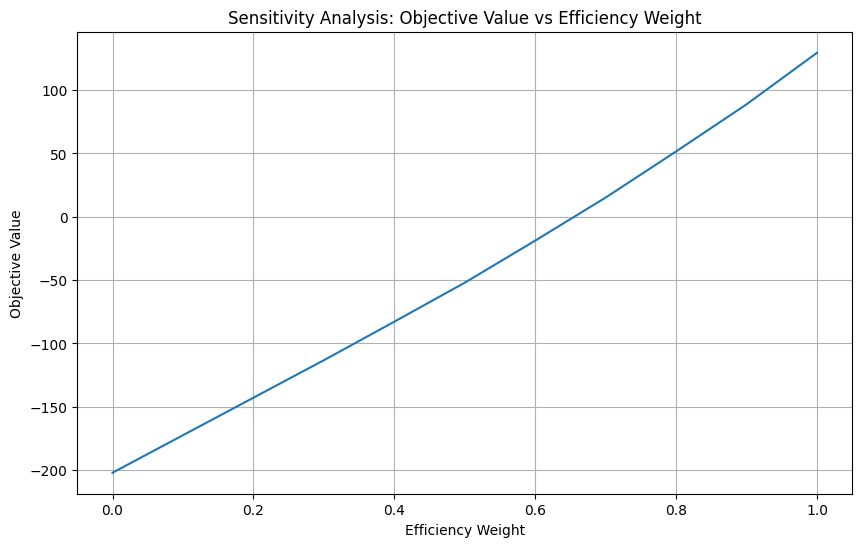

In [69]:
# Plotting the results
plt.figure(figsize=(10, 6))
sns.lineplot(x=efficiency_weights, y=objective_values)  # Corrected this line
plt.title('Sensitivity Analysis: Objective Value vs Efficiency Weight')
plt.xlabel('Efficiency Weight')
plt.ylabel('Objective Value')
plt.grid(True)
plt.show()


In [70]:
sensitivity_data = pd.DataFrame({'Efficiency Weight': efficiency_weights, 'Objective Value': objective_values})
print(sensitivity_data)

    Efficiency Weight  Objective Value
0                 0.0           -202.0
1                 0.1           -172.4
2                 0.2           -142.8
3                 0.3           -113.2
4                 0.4            -82.8
5                 0.5            -52.0
6                 0.6            -18.8
7                 0.7             15.2
8                 0.8             51.6
9                 0.9             88.8
10                1.0            129.5


Analiza Wrażliwości Kosztów Utrzymania Specjalisty Typu A dla Zadania II

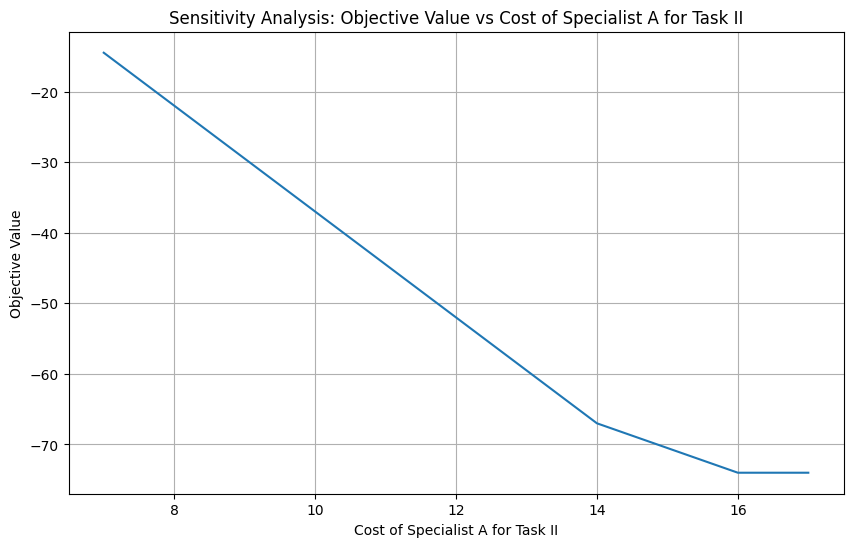

In [71]:
# Zakres zmian kosztu utrzymania specjalisty typu A dla zadania II
cost_range = range(int(costs['A']['II'] - 5), int(costs['A']['II'] + 6))

# Przechowywanie wyników
cost_sensitivity_results = []

for cost in cost_range:
    # Zmiana kosztu w danych
    costs['A']['II'] = cost
    combined_values = {i: {j: efficiency_weight * efficiency[i][j] - cost_weight * costs[i][j] for j in tasks} for i in specialists}

    # Aktualizacja funkcji celu
    problem.objective = pulp.lpSum([x[(i, j)] * combined_values[i][j] for i in specialists for j in tasks])
    problem.solve()
    cost_sensitivity_results.append(pulp.value(problem.objective))

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(cost_range), y=cost_sensitivity_results)
plt.title('Sensitivity Analysis: Objective Value vs Cost of Specialist A for Task II')
plt.xlabel('Cost of Specialist A for Task II')
plt.ylabel('Objective Value')
plt.grid(True)
plt.show()


In [72]:
sensitivity_data = pd.DataFrame({'Efficiency Weight': cost_range, 'Objective Value': cost_sensitivity_results})
print(sensitivity_data)

    Efficiency Weight  Objective Value
0                   7            -14.5
1                   8            -22.0
2                   9            -29.5
3                  10            -37.0
4                  11            -44.5
5                  12            -52.0
6                  13            -59.5
7                  14            -67.0
8                  15            -70.5
9                  16            -74.0
10                 17            -74.0


Analiza Wrażliwości Wydajności Specjalisty Typu A

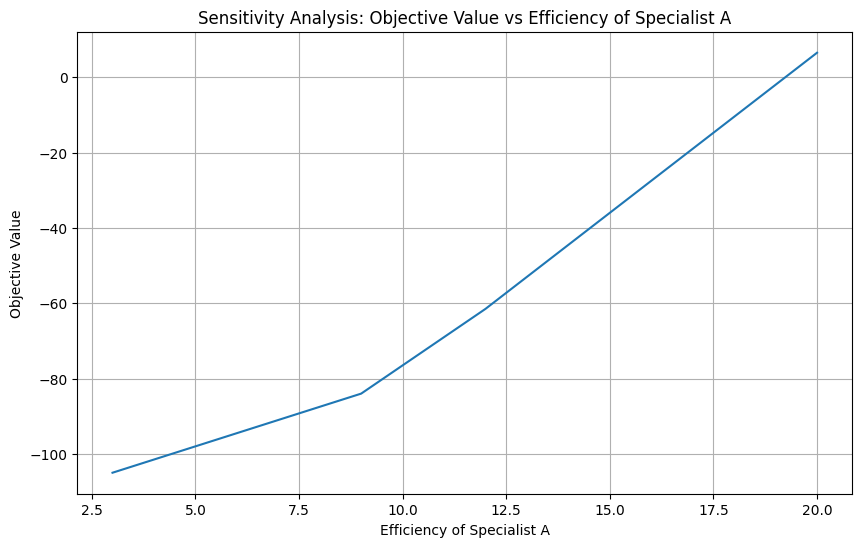

In [73]:
# Zakres zmian wydajności specjalisty typu A
efficiency_range = range(int(min(efficiency['A'].values()) - 5), int(max(efficiency['A'].values()) + 6))

# Przechowywanie wyników
efficiency_sensitivity_results = []

for eff in efficiency_range:
    # Zmiana wydajności w danych
    for task in tasks:
        efficiency['A'][task] = eff
    combined_values = {i: {j: efficiency_weight * efficiency[i][j] - cost_weight * costs[i][j] for j in tasks} for i in specialists}

    # Aktualizacja funkcji celu
    problem.objective = pulp.lpSum([x[(i, j)] * combined_values[i][j] for i in specialists for j in tasks])
    problem.solve()
    efficiency_sensitivity_results.append(pulp.value(problem.objective))

# Wizualizacja wyników
plt.figure(figsize=(10, 6))
sns.lineplot(x=list(efficiency_range), y=efficiency_sensitivity_results)
plt.title('Sensitivity Analysis: Objective Value vs Efficiency of Specialist A')
plt.xlabel('Efficiency of Specialist A')
plt.ylabel('Objective Value')
plt.grid(True)
plt.show()


In [74]:
sensitivity_data = pd.DataFrame({'Efficiency Weight': efficiency_range, 'Objective Value': efficiency_sensitivity_results})
print(sensitivity_data)

    Efficiency Weight  Objective Value
0                   3           -105.0
1                   4           -101.5
2                   5            -98.0
3                   6            -94.5
4                   7            -91.0
5                   8            -87.5
6                   9            -84.0
7                  10            -76.5
8                  11            -69.0
9                  12            -61.5
10                 13            -53.0
11                 14            -44.5
12                 15            -36.0
13                 16            -27.5
14                 17            -19.0
15                 18            -10.5
16                 19             -2.0
17                 20              6.5


In [82]:
# Sensitivity analysis

In [83]:


# Define the function to solve the optimization problem with given weights
def solve_problem_with_weights(efficiency, costs, weight_efficiency, weight_cost):
    # Normalization
    max_efficiency = max(max(d.values()) for d in efficiency.values())
    min_efficiency = min(min(d.values()) for d in efficiency.values())
    max_cost = max(max(d.values()) for d in costs.values())
    min_cost = min(min(d.values()) for d in costs.values())

    normalized_efficiency = {i: {j: (efficiency[i][j] - min_efficiency) / (max_efficiency - min_efficiency) for j in efficiency[i]} for i in efficiency}
    normalized_costs = {i: {j: (costs[i][j] - min_cost) / (max_cost - min_cost) for j in costs[i]} for i in costs}

    # Setting up the problem
    problem = pulp.LpProblem("Optimization", pulp.LpMaximize)

    # Decision Variables
    x = pulp.LpVariable.dicts("x", [(i, j) for i in specialists for j in tasks], lowBound=0, cat='Continuous')

    # Objective Function
    problem += weight_efficiency * pulp.lpSum([x[(i, j)] * normalized_efficiency[i][j] for i in specialists for j in tasks]) - weight_cost * pulp.lpSum([x[(i, j)] * normalized_costs[i][j] for i in specialists for j in tasks])

    # Constraints
    for j in tasks:
        problem += pulp.lpSum([x[(i, j)] for i in specialists]) == tasks[j]

    for i in specialists:
        problem += pulp.lpSum([x[(i, j)] for j in tasks]) <= specialists[i]

    # Solve the problem
    problem.solve()

    # Calculate and return total efficiency and total cost
    total_efficiency = sum([x[(i, j)].varValue * efficiency[i][j] for i in specialists for j in tasks])
    total_cost = sum([x[(i, j)].varValue * costs[i][j] for i in specialists for j in tasks])
    return total_efficiency, total_cost







In [84]:
# Function to perform sensitivity analysis and visualize results
def visualize_and_tabulate(weights, efficiency_changes, cost_changes):
    results = []
    for eff_change in efficiency_changes:
        for cost_change in cost_changes:
            modified_efficiency = original_efficiency.copy()
            modified_costs = original_costs.copy()
            for task in tasks:
                modified_efficiency['A'][task] += eff_change
                modified_costs['A'][task] += cost_change

            eff, cost = solve_problem_with_weights(modified_efficiency, modified_costs, weights[0], weights[1])
            results.append((eff_change, cost_change, eff, cost))

    # Convert to DataFrame for tabular representation
    df = pd.DataFrame(results, columns=['Efficiency Change', 'Cost Change', 'Total Efficiency', 'Total Cost'])

    # Plotting
    plt.figure(figsize=(12, 6))
    for eff_change in np.unique(df['Efficiency Change']):
        subset = df[df['Efficiency Change'] == eff_change]
        plt.plot(subset['Cost Change'], subset['Total Efficiency'], label=f'Efficiency Change: {eff_change}')

    plt.title('Sensitivity Analysis: Total Efficiency vs Cost Change')
    plt.xlabel('Cost Change')
    plt.ylabel('Total Efficiency')
    plt.legend()
    plt.grid(True)
    plt.show()

    return df

In [85]:
# Initial Data
specialists = {'A': 17, 'B': 12, 'C': 8, 'D': 10}
tasks = {'I': 10, 'II': 15, 'III': 12}
original_efficiency = {
    'A': {'I': 14.0, 'II': 8.0, 'III': 15.0},
    'B': {'I': 9.0, 'II': 9.0, 'III': 10.0},
    'C': {'I': 6.0, 'II': 7.0, 'III': 6.0},
    'D': {'I': 11.0, 'II': 4.0, 'III': 9.0}
}
original_costs = {
    'A': {'I': 12.0, 'II': 12.0, 'III': 18.0},
    'B': {'I': 8.0, 'II': 19.0, 'III': 14.0},
    'C': {'I': 10.0, 'II': 15.0, 'III': 11.0},
    'D': {'I': 12.0, 'II': 13.0, 'III': 14.0}
}

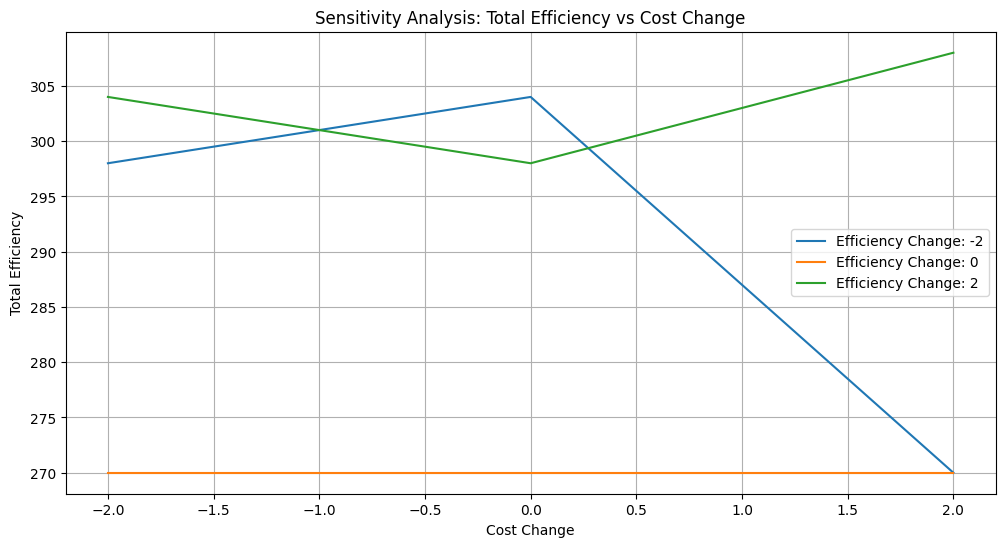

   Efficiency Change  Cost Change  Total Efficiency  Total Cost
0                 -2           -2             298.0       402.0
1                 -2            0             304.0       458.0
2                 -2            2             270.0       452.0
3                  0           -2             270.0       438.0
4                  0            0             270.0       438.0
5                  0            2             270.0       452.0
6                  2           -2             304.0       458.0
7                  2            0             298.0       402.0
8                  2            2             308.0       412.0


In [86]:
# Example Usage
weights = [0.5, 0.5]  # Example weights for efficiency and cost
efficiency_changes = [-2, 0, 2]  # Example changes in efficiency
cost_changes = [-2, 0, 2]  # Example changes in cost

# Generate and display results
results_df = visualize_and_tabulate(weights, efficiency_changes, cost_changes)
print(results_df)
